# 📊 US Superstore Data Visualization Challenge

## Interactive Data Visualization with Matplotlib and Seaborn

**Objectives:**
- Advanced data visualization techniques
- Interactive chart creation using Matplotlib
- Elegant static data presentation with Seaborn
- Comparative analysis of both visualization libraries

---

## 📦 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider, Button
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1️⃣ Data Preparation

### Load and Explore the Dataset

In [7]:
# Load the data
df = pd.read_excel('/content/US Superstore data.xls')

print("Dataset Overview:")
print(f"Records: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")
print(f"\nDate Range: {df['Order Date'].min().strftime('%Y-%m-%d')} to {df['Order Date'].max().strftime('%Y-%m-%d')}")

# Display first few rows
df.head()

Dataset Overview:
Records: 9,994
Features: 21

Date Range: 2014-01-03 to 2017-12-30


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleaning and Preprocessing

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n✅ No missing values detected!")

# Extract date components for time series analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

print("\n✅ Date features engineered successfully!")

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

✅ No missing values detected!

✅ Date features engineered successfully!


In [9]:
# Summary Statistics
print("📈 Key Business Metrics:\n")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Average Order Value: ${df['Sales'].mean():.2f}")
print(f"Profit Margin: {(df['Profit'].sum() / df['Sales'].sum() * 100):.2f}%")
print(f"\nNumber of Products: {df['Product Name'].nunique():,}")
print(f"Number of Customers: {df['Customer ID'].nunique():,}")
print(f"Geographic Coverage: {df['State'].nunique()} states")
print(f"\nProfitable Orders: {(df['Profit'] > 0).sum():,} ({(df['Profit'] > 0).sum()/len(df)*100:.1f}%)")

📈 Key Business Metrics:

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Order Value: $229.86
Profit Margin: 12.47%

Number of Products: 1,850
Number of Customers: 793
Geographic Coverage: 49 states

Profitable Orders: 8,058 (80.6%)


---

## 2️⃣ Matplotlib Visualizations - Interactive Charts

### 2.1 Interactive Sales Trends Over Time

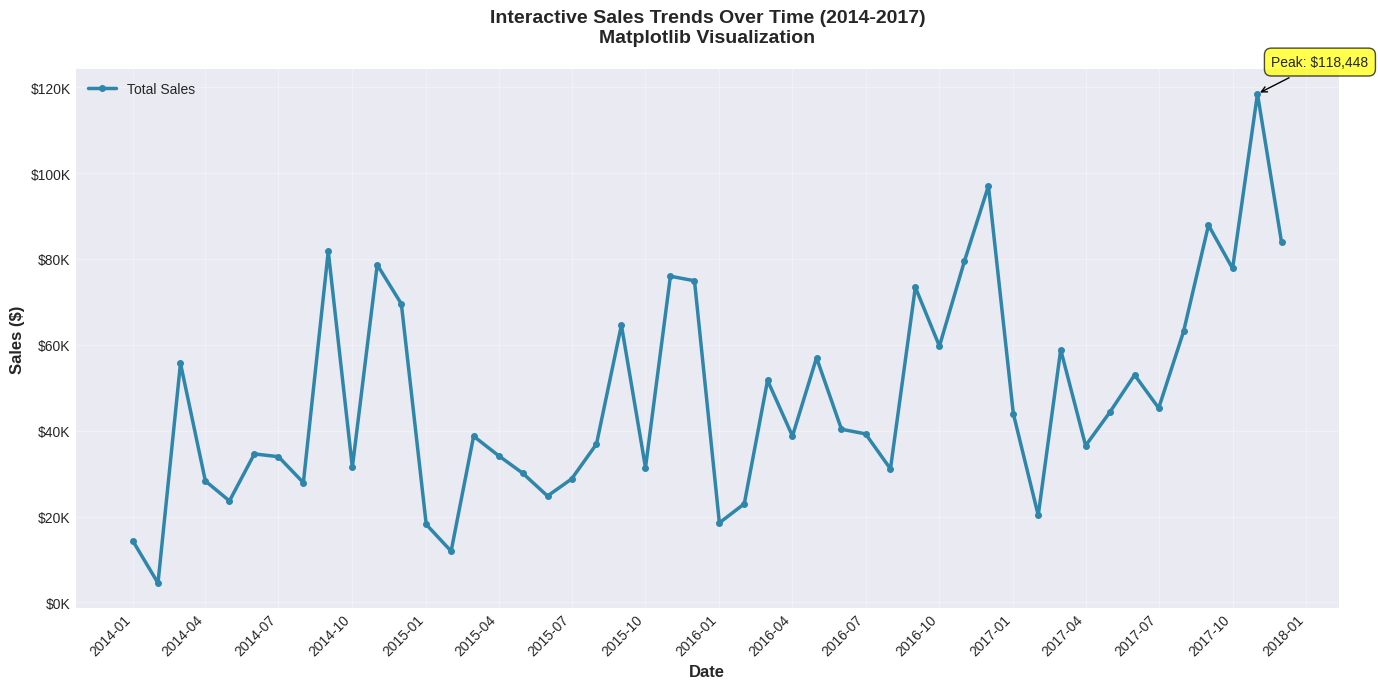


📊 Insights:
• Peak sales occurred in November 2017: $118,447.82
• Average monthly sales: $47,858.35
• Sales show clear seasonality with Q4 peaks


In [10]:
# Aggregate sales by month
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()

# Create interactive line chart
fig, ax = plt.subplots(figsize=(14, 7))

line, = ax.plot(monthly_sales['Year-Month'], monthly_sales['Sales'],
                linewidth=2.5, marker='o', markersize=4, label='Total Sales', color='#2E86AB')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Sales ($)', fontsize=12, fontweight='bold')
ax.set_title('Interactive Sales Trends Over Time (2014-2017)\nMatplotlib Visualization',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

# Format axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add annotation for peak sales
max_sales_idx = monthly_sales['Sales'].idxmax()
max_sales_date = monthly_sales.loc[max_sales_idx, 'Year-Month']
max_sales_value = monthly_sales.loc[max_sales_idx, 'Sales']

ax.annotate(f'Peak: ${max_sales_value:,.0f}',
           xy=(max_sales_date, max_sales_value),
           xytext=(10, 20), textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

print("\n📊 Insights:")
print(f"• Peak sales occurred in {max_sales_date.strftime('%B %Y')}: ${max_sales_value:,.2f}")
print(f"• Average monthly sales: ${monthly_sales['Sales'].mean():,.2f}")
print(f"• Sales show clear seasonality with Q4 peaks")

### 2.2 Geographic Sales Distribution

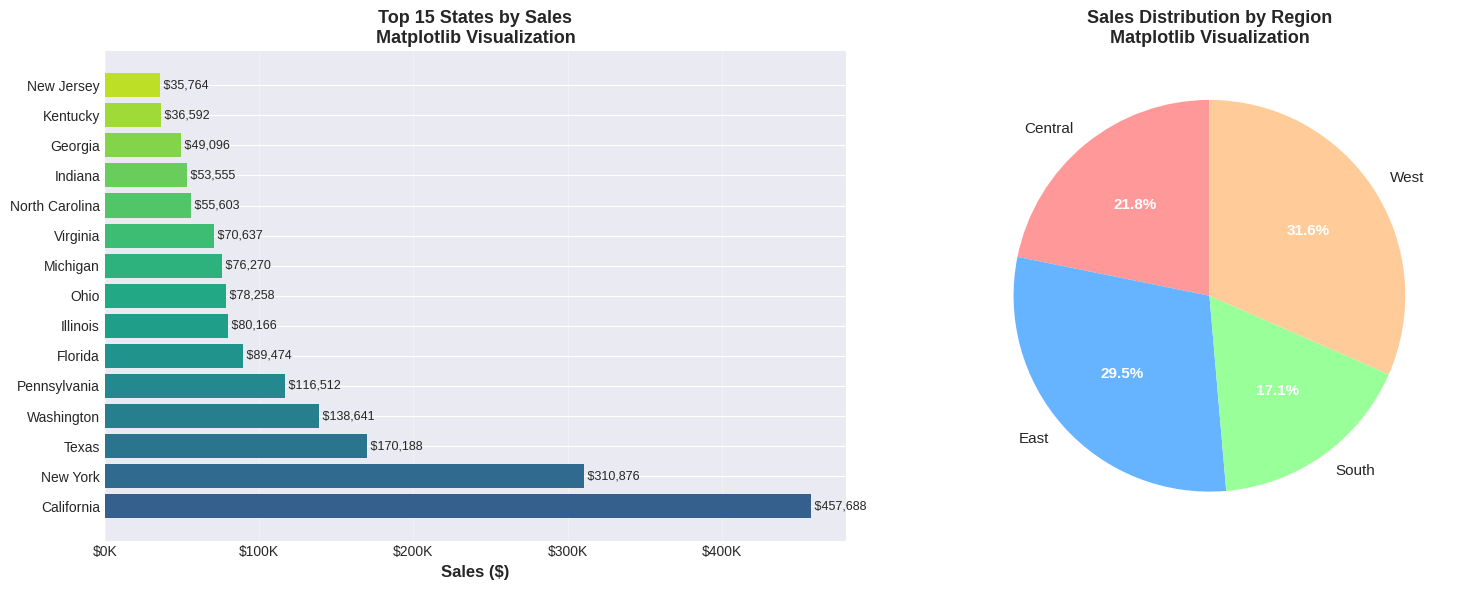


🗺️ Geographic Insights:
• Top state: California ($457,687.63)
• Top 5 states account for 52.0% of sales
• Dominant region: West (31.6%)


In [11]:
# Prepare geographic data
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
regional_sales = df.groupby('Region')['Sales'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 States Bar Chart
top_states = state_sales.head(15)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_states)))
bars = ax1.barh(range(len(top_states)), top_states.values, color=colors)
ax1.set_yticks(range(len(top_states)))
ax1.set_yticklabels(top_states.index)
ax1.set_xlabel('Sales ($)', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 States by Sales\nMatplotlib Visualization', fontsize=13, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_states.values)):
    ax1.text(value, i, f' ${value:,.0f}', va='center', fontsize=9)

# Regional Pie Chart
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = ax2.pie(regional_sales.values, labels=regional_sales.index,
                                    autopct='%1.1f%%', startangle=90, colors=colors_pie,
                                    textprops={'fontsize': 11})
ax2.set_title('Sales Distribution by Region\nMatplotlib Visualization', fontsize=13, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("\n🗺️ Geographic Insights:")
print(f"• Top state: {state_sales.index[0]} (${state_sales.iloc[0]:,.2f})")
print(f"• Top 5 states account for {(state_sales.head(5).sum() / state_sales.sum() * 100):.1f}% of sales")
print(f"• Dominant region: {regional_sales.idxmax()} ({(regional_sales.max() / regional_sales.sum() * 100):.1f}%)")

---

## 3️⃣ Seaborn Visualizations - Elegant Static Plots

### 3.1 Top 10 Products by Sales

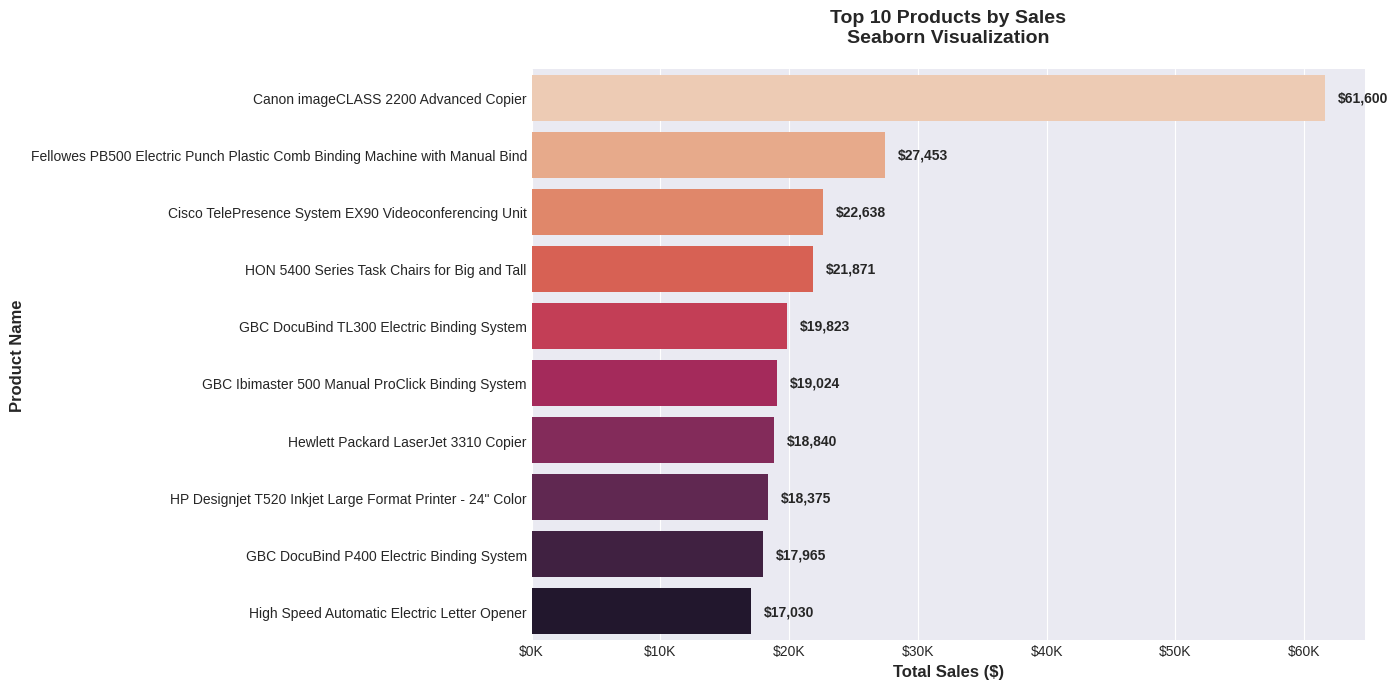


🏆 Top Products Insights:
• Highest selling product: Canon imageCLASS 2200 Advanced Copier
• Sales: $61,599.82
• Top 10 products total: $244,620.20


In [12]:
# Get top 10 products
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 7))

# Create horizontal bar chart with seaborn
sns.barplot(x=product_sales.values, y=product_sales.index, palette='rocket_r', ax=ax)

ax.set_xlabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Product Name', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Products by Sales\nSeaborn Visualization', fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(product_sales.values):
    ax.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=10, fontweight='bold')

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("\n🏆 Top Products Insights:")
print(f"• Highest selling product: {product_sales.index[0]}")
print(f"• Sales: ${product_sales.iloc[0]:,.2f}")
print(f"• Top 10 products total: ${product_sales.sum():,.2f}")

### 3.2 Profit vs Discount Analysis

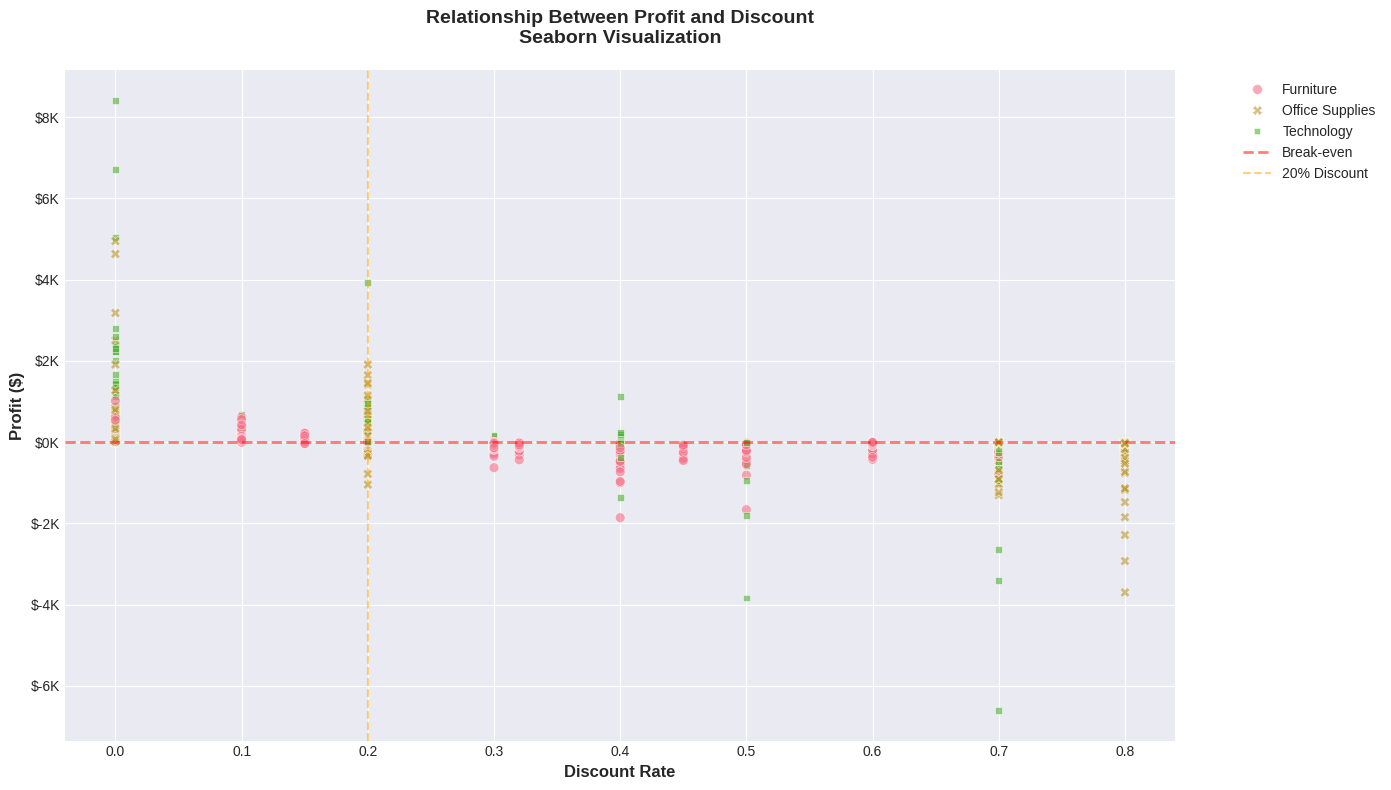


💰 Profit-Discount Insights:
• Correlation: -0.219 (negative relationship)
• High discounts (>40%) often result in negative profits
• Optimal discount range: 0-20% for profitability
• Profitable orders: 8,058 (80.6%)


In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

# Scatter plot with category coloring
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category',
               style='Category', alpha=0.6, s=50, ax=ax)

ax.set_xlabel('Discount Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('Profit ($)', fontsize=12, fontweight='bold')
ax.set_title('Relationship Between Profit and Discount\nSeaborn Visualization',
            fontsize=14, fontweight='bold', pad=20)

# Reference lines
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Break-even')
ax.axvline(x=0.2, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='20% Discount')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💰 Profit-Discount Insights:")
correlation = df['Discount'].corr(df['Profit'])
print(f"• Correlation: {correlation:.3f} (negative relationship)")
print(f"• High discounts (>40%) often result in negative profits")
print(f"• Optimal discount range: 0-20% for profitability")
print(f"• Profitable orders: {(df['Profit'] > 0).sum():,} ({(df['Profit'] > 0).sum()/len(df)*100:.1f}%)")

### 3.3 Category Performance Analysis

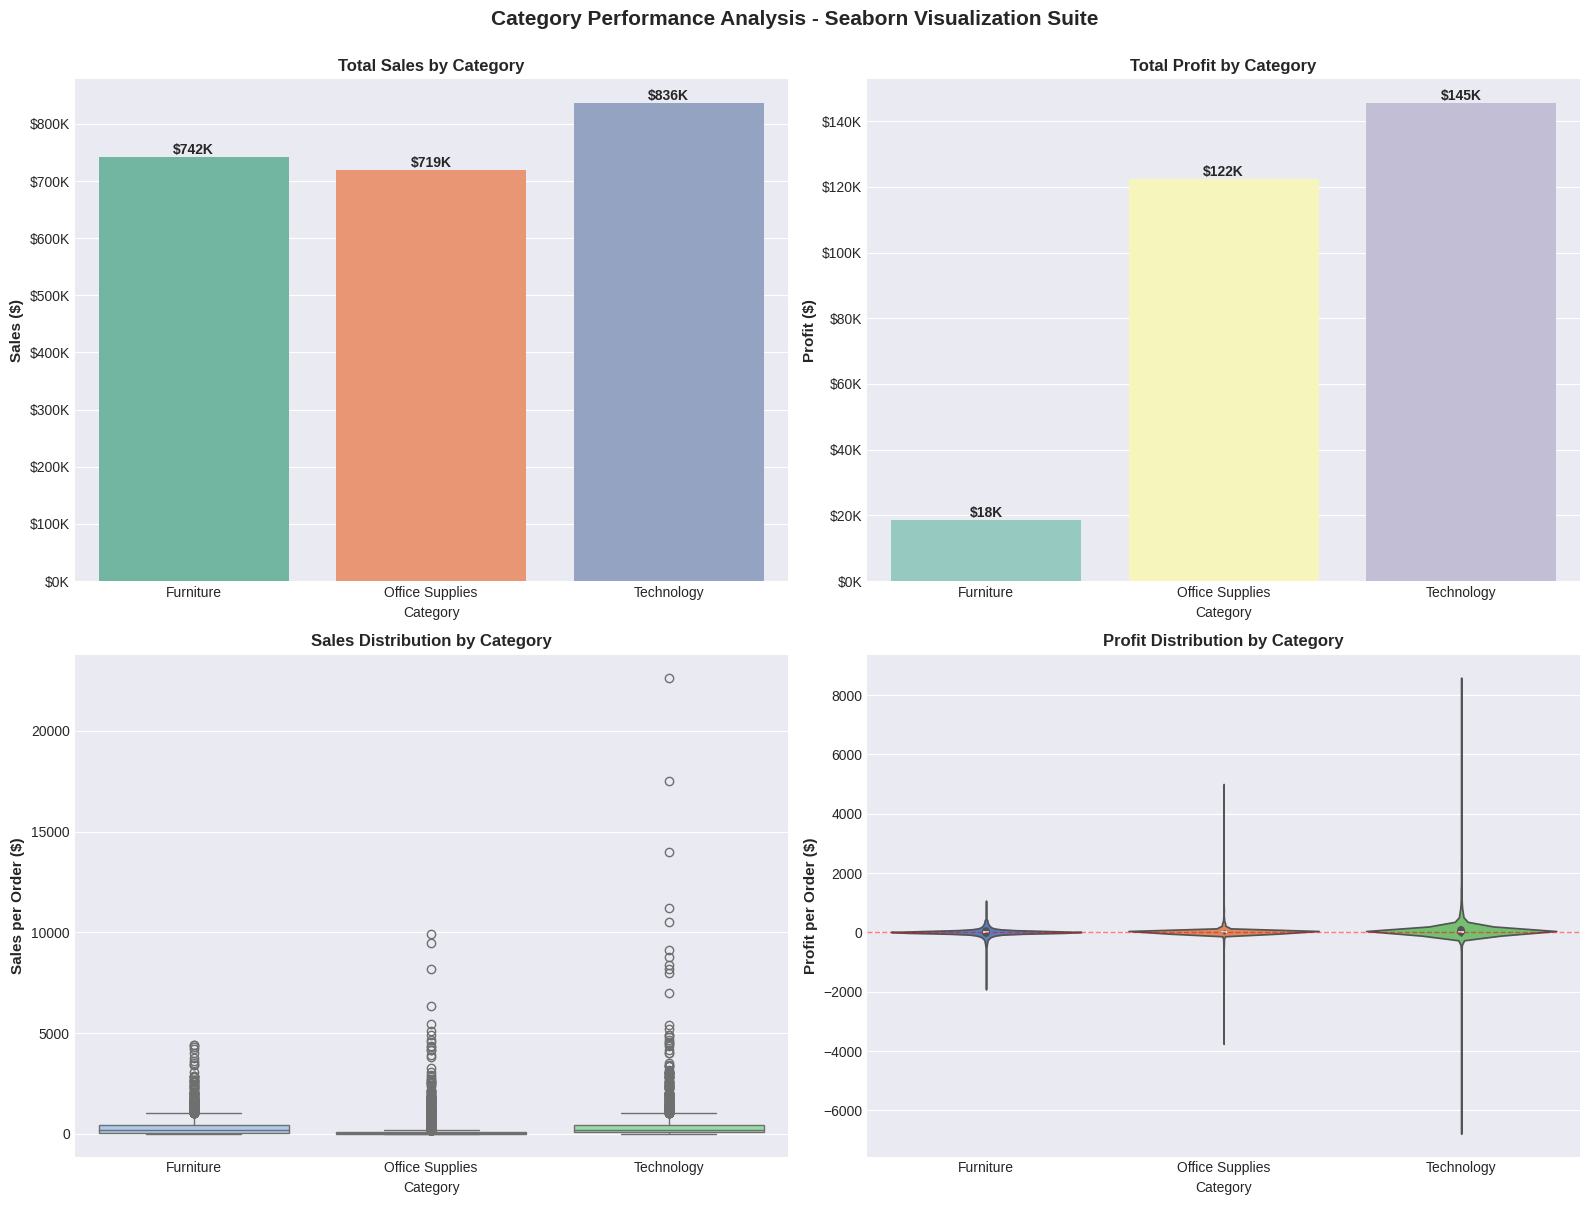


📦 Category Insights:
• Best selling: Technology ($836,154.03)
• Most profitable: Technology ($145,454.95)

Profit Margins:
  • Furniture: 2.49%
  • Office Supplies: 17.04%
  • Technology: 17.40%


In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

category_stats = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'})

# 1. Sales by Category
sns.barplot(x=category_stats.index, y=category_stats['Sales'], palette='Set2', ax=ax1)
ax1.set_title('Total Sales by Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sales ($)', fontsize=11, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
for i, v in enumerate(category_stats['Sales']):
    ax1.text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

# 2. Profit by Category
sns.barplot(x=category_stats.index, y=category_stats['Profit'], palette='Set3', ax=ax2)
ax2.set_title('Total Profit by Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Profit ($)', fontsize=11, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
for i, v in enumerate(category_stats['Profit']):
    ax2.text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

# 3. Sales Distribution
sns.boxplot(data=df, x='Category', y='Sales', palette='pastel', ax=ax3)
ax3.set_title('Sales Distribution by Category', fontsize=12, fontweight='bold')
ax3.set_ylabel('Sales per Order ($)', fontsize=11, fontweight='bold')

# 4. Profit Distribution
sns.violinplot(data=df, x='Category', y='Profit', palette='muted', ax=ax4)
ax4.set_title('Profit Distribution by Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Profit per Order ($)', fontsize=11, fontweight='bold')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.suptitle('Category Performance Analysis - Seaborn Visualization Suite',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📦 Category Insights:")
print(f"• Best selling: {category_stats['Sales'].idxmax()} (${category_stats['Sales'].max():,.2f})")
print(f"• Most profitable: {category_stats['Profit'].idxmax()} (${category_stats['Profit'].max():,.2f})")
print("\nProfit Margins:")
for cat in category_stats.index:
    margin = (category_stats.loc[cat, 'Profit'] / category_stats.loc[cat, 'Sales'] * 100)
    print(f"  • {cat}: {margin:.2f}%")

---

## 4️⃣ Comparative Analysis: Matplotlib vs Seaborn

### Tool Comparison

### 📊 **MATPLOTLIB**

**Strengths:**
- ✅ Highly customizable - full control over every visual element
- ✅ Excellent for interactive visualizations (sliders, buttons, animations)
- ✅ Superior for complex multi-panel layouts and custom designs
- ✅ Better for precise positioning and fine-tuning
- ✅ More suitable for publication-quality scientific plots
- ✅ Wider range of plot types including 3D visualizations

**Best Use Cases:**
- Time series with custom interactivity
- Complex multi-panel dashboards
- Custom visualizations requiring precise control
- Geographic visualizations and maps
- Scientific and engineering applications

**Code Complexity:** Medium to High (more verbose, more control)

---

### 🎨 **SEABORN**

**Strengths:**
- ✅ Built on Matplotlib with beautiful default aesthetics
- ✅ Simpler syntax for statistical visualizations
- ✅ Excellent for rapid exploratory data analysis
- ✅ Automatic handling of categorical data
- ✅ Beautiful, professional color palettes out of the box
- ✅ Better integration with pandas DataFrames
- ✅ Built-in statistical plots (regression, distribution)

**Best Use Cases:**
- Quick statistical plots (distribution, correlation)
- Category comparisons (bar, box, violin plots)
- Scatter plots with categorical coloring
- Professional-looking plots with minimal code
- Data exploration and analysis

**Code Complexity:** Low to Medium (concise, elegant)

---

### 💡 **RECOMMENDATIONS**

1. **Use Matplotlib when:**
   - You need fine-grained control over plot elements
   - Building interactive dashboards or applications
   - Creating custom or unusual visualizations
   - Working with animations or real-time data

2. **Use Seaborn when:**
   - Performing exploratory data analysis
   - Need beautiful plots quickly
   - Working with statistical relationships
   - Presenting findings to non-technical audiences

3. **Best Practice - Combine Both:**
   - Use Seaborn for quick, beautiful statistical plots
   - Then customize with Matplotlib for final touches
   - For dashboards: Matplotlib structure + Seaborn individual plots

---

### 🎓 **Learning Outcomes from This Challenge**

✅ **Technical Skills:**
- Advanced data visualization techniques
- Interactive chart creation with Matplotlib
- Statistical visualization with Seaborn
- Data preprocessing and feature engineering

✅ **Analytical Skills:**
- Time series trend analysis
- Geographic data visualization
- Correlation and relationship analysis
- Business metrics interpretation

✅ **Best Practices:**
- Clean, documented code
- Proper data cleaning workflows
- Tool selection based on requirements
- Professional presentation standards